# Remote-class transcript for Lecture 18, March 12, 2020


In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import cs111
np.set_printoptions(precision = 4)

# Singular value decomposition

Today's last class of Winter quarter 2020 continues our discussion of the singular value decomposition, or SVD. 

First we'll review and illustrate the theoretical properties of the SVD that we presented in class last time. Then we will apply the SVD to a fairly simple task in data analysis, just to whet your appetite for the many applications in which SVD has become important in modern computing. We'll finish by looking at the ideas (though not the detailed algorithms) involved in computing the SVD.

First let's review the theory. The singular value decomposition of an arbitrary $m$-by-$n$ matrix $A$ is

$$A = USV^T,$$

where $U$ is an $m$-by-$m$ orthogonal matrix ($U$'s columns $u_0$, $u_1$, $\ldots$, $u_{m-1}$ all have length 1 and are perpendicular to each other, so that $U^TU=I$); and $V$ is an $n$-by-$n$ orthogonal matrix ($V^TV=I$, where now the $v_i$ are columns of $V$ and thus _rows_ of $V^T$); and $S$ is an $m$-by-$n$ diagonal matrix, whose diagonal elements are $\sigma_0 \ge \sigma_1 \ge \ldots \ge \sigma_{\min(m,n)-1}\ge 0$. The $\sigma_i$'s are called the _singular values_ of $A$.

In the next few cells we compute the SVD of a random 8-by-5 matrix. 

In [2]:
A = np.random.rand(8,5)
print('A:\n', A)

A:
 [[0.1815 0.3759 0.1095 0.2781 0.7969]
 [0.3721 0.1347 0.7497 0.2156 0.3175]
 [0.2182 0.6688 0.9484 0.6584 0.5308]
 [0.7326 0.0398 0.4627 0.5352 0.258 ]
 [0.2329 0.1916 0.9313 0.4898 0.2313]
 [0.5096 0.6862 0.6704 0.8447 0.1784]
 [0.823  0.9472 0.3951 0.5567 0.8837]
 [0.3021 0.2941 0.7092 0.4666 0.6619]]


The scipy routine spla.svd(A) returns the three elements of the SVD, but not exactly in the form $A=USV^T$. Instead, spla.svd() returns the matrix $U$, then a vector of the $\min(m-1, n-1)$ singular values, then the matrix $V^T$ (not $V$). In the next cell we use spla.svd() to compute the SVD and then form the actual matrices $U$, $S$, and $V$.

In [3]:
nrows, ncols = A.shape
print('shape of A:', (nrows, ncols))

U,sigma,Vt = spla.svd(A)

print('shape of U:', U.shape)
print('sigma:', sigma)
print('shape of Vt:', Vt.shape)

S = np.zeros((nrows,ncols))
for i in range(len(sigma)):
    S[i,i] = sigma[i]
V = Vt.T

print('\nU:\n', U)
print('\nS:\n', S)
print('\nV:\n', V)

print()
print('norm of difference between U.T@U and I  :', npla.norm(U.T@U-np.eye(nrows)))
print('norm of difference between V.T@V and I  :', npla.norm(V.T@V-np.eye(ncols)))
print('norm of difference between U@S@V.T and A:', npla.norm(U@S@V.T - A) )

shape of A: (8, 5)
shape of U: (8, 8)
sigma: [3.221  1.0133 0.6835 0.6032 0.2865]
shape of Vt: (5, 5)

U:
 [[-0.2324  0.4872 -0.3775 -0.1642  0.4693  0.07   -0.4314 -0.3577]
 [-0.2605 -0.2732 -0.1191 -0.3791 -0.5674  0.5034 -0.246  -0.2523]
 [-0.4353 -0.1756 -0.3547  0.3837 -0.009  -0.0818  0.5479 -0.4468]
 [-0.2798 -0.1324  0.5747 -0.5539  0.3342 -0.1202  0.2697 -0.2612]
 [-0.3099 -0.485  -0.166  -0.0497 -0.0012 -0.6446 -0.4476  0.1509]
 [-0.4046 -0.1461  0.4415  0.5482  0.2333  0.3924 -0.315   0.1091]
 [-0.4799  0.6173  0.217   0.0237 -0.4803 -0.2755  0.0393  0.1812]
 [-0.3469 -0.0443 -0.343  -0.2678  0.2468  0.274   0.2816  0.6878]]

S:
 [[3.221  0.     0.     0.     0.    ]
 [0.     1.0133 0.     0.     0.    ]
 [0.     0.     0.6835 0.     0.    ]
 [0.     0.     0.     0.6032 0.    ]
 [0.     0.     0.     0.     0.2865]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]]

V:
 [[-0.3779  0.1566  0.7199 -0.4751 -0.2977

# SVD theorems

We review and illustrate the theorems about SVD that we saw at the end of Tuesday's class.

<h3>Theorem 1. The rank of $A$ is the number of nonzero singular values.</h3>

In our example, sure enough, the matrix $A$ has rank 5.

In [4]:
print('rank(A):', npla.matrix_rank(A))
print('singular values:', sigma)

rank(A): 5
singular values: [3.221  1.0133 0.6835 0.6032 0.2865]


In floating-point arithmetic, what counts as "nonzero" can be a judgement call. To illustrate this, we form a new 8-by-5 matrix $B$ whose first 4 columns are the same as $A$ and whose 5th column is the sum of the first 4 columns. Mathematically speaking, $B$ should have rank 4 because one column is linearly dependent on the other four columns. In floating-point arithmetic, though, round-off error makes the last column not quite exactly equal to the sum of the others. The exact rank of this perturbed matrix is 5, and sure enough all of its computed singular values are nonzero. However, because only 4 of the singular values are significantly larger than machine epsilon, we (and numpy) say that $B$ has "numerical rank" 4.

In [5]:
B = A.copy()
B[:,4] = A @ [1,1,1,1,0]
# can you see why this replaces column 4 of B with the sum of the first 4 columns of A?

print('B:\n', B)
print()
print('B @ [1,1,1,1,-1] (should be the zero vector):\n', B @ [1,1,1,1,-1])

print()
UB, sigmaB, VtB = spla.svd(B)
print('singular values of B:', sigmaB)
# notice that the smallest singular value is approximately roundoff error, so we call it zero

print()
print('computed numerical rank of B:', npla.matrix_rank(B))

B:
 [[0.1815 0.3759 0.1095 0.2781 0.945 ]
 [0.3721 0.1347 0.7497 0.2156 1.4722]
 [0.2182 0.6688 0.9484 0.6584 2.4938]
 [0.7326 0.0398 0.4627 0.5352 1.7702]
 [0.2329 0.1916 0.9313 0.4898 1.8457]
 [0.5096 0.6862 0.6704 0.8447 2.7108]
 [0.823  0.9472 0.3951 0.5567 2.722 ]
 [0.3021 0.2941 0.7092 0.4666 1.7721]]

B @ [1,1,1,1,-1] (should be the zero vector):
 [0.0000e+00 1.1102e-16 0.0000e+00 0.0000e+00 0.0000e+00 2.2204e-16
 0.0000e+00 2.2204e-16]

singular values of B: [6.5055e+00 9.0474e-01 6.3417e-01 3.1961e-01 1.7959e-16]

computed numerical rank of B: 4


We defined the 2-norm of a matrix early in the course, 
but we never talked about algorithms to compute it.
It turns out that the SVD gives us an algorithm.

<h3>Theorem 2. The 2-norm $||A||_2$ is equal to the largest singular value $\sigma_0$.</h3>

This is because the norm of $A$ is the largest stretch it applies to any vector, 

$$||A|| = \max_x (||Ax||/||x||).$$

We saw in class last time that $A$ maps the unit sphere to an ellipsoid, and the largest stretch happens at the longest axis of the ellipsoid, whose length is $\sigma_0$. The actual vectors are $x=v_0$ and $Ax = \sigma_0 u_0$.

In [6]:
v0 = V[:,0]
u0 = U[:,0]

print('singular values of A:', sigma)
print('2-norm of A:', npla.norm(A,2))
print()
print('v_0:', v0)
print('u_0:', u0)
print('Av_0:', A@v0)
print()
print('||Av_0|| / ||v_0|| :', npla.norm(A@v0,2) / npla.norm(v0,2))

singular values of A: [3.221  1.0133 0.6835 0.6032 0.2865]
2-norm of A: 3.2209542454944096

v_0: [-0.3779 -0.4093 -0.546  -0.4594 -0.4249]
u_0: [-0.2324 -0.2605 -0.4353 -0.2798 -0.3099 -0.4046 -0.4799 -0.3469]
Av_0: [-0.7486 -0.839  -1.402  -0.9012 -0.9982 -1.3033 -1.5456 -1.1174]

||Av_0|| / ||v_0|| : 3.2209542454944087


The SVD also gives us a way to compute the condition number of $A$ in the 2-norm, $\kappa_2(A)$.
Recall the definition

$$\kappa(A) = \max(\mbox{stretch}) / \min(\mbox{stretch}),$$

the ratio of the maximum amount any vector is stretched by $A$ to the minimum amount 
any vector is stretched by $A$. 
(The minimum is 0 if $A$ is square and singular, 
or more generally if the rank of $A$ is less than the number of columns,
and in that case the condition number is infinite.
If $A$ is square and nonsingular, the condition number is $||A|| / ||A^{-1}||.$)

From the discussion of $||A||_2$ above, it is clear that

<h3>Theorem 3. The 2-norm condition number  $\kappa_2(A)$ is equal to the ratio of the largest and smallest singular values,</h3>

$$\kappa_2(A) = \sigma_0 / \sigma_{\min(m,n)-1}$$

In [7]:
print('ratio of extreme singular values: ', sigma[0]/sigma[-1])
#print('2-norm condition number of matrix:', npla.cond(A,2))
# Unfortunately numpy's condition number routine doesn't work for non-square matrices!

ratio of extreme singular values:  11.24304435703011


The _Frobenius norm_ of a matrix is the square root of the sum of the squares of all
of its elements. It's as if we took the whole $m$-by-$n$ matrix as a vector in $mn$-dimensional space and computed its Euclidean length. This is an easy norm to compute, but actually it shows up more often in theorems than in numerical computation. One such theorem is this one.

<h3>Theorem 4. The Frobenius norm $||A||_F$ is equal to $(\sum_i \sigma_i^2)^{1/2}$.</h3>

Let's check it out.

In [8]:
sumsig = 0
for i in range(len(sigma)):
    sumsig += sigma[i]**2
print('sqrt(sum(singular values)):', np.sqrt(sumsig))

sumsqA = 0
for i in range(nrows):
    for j in range(ncols):
        sumsqA += A[i,j]**2
print('sqrt(sum(matrix elements)):', np.sqrt(sumsqA))

print('Frobenius norm of matrix:  ', npla.norm(A,'fro'))


sqrt(sum(singular values)): 3.509199764572346
sqrt(sum(matrix elements)): 3.5091997645723456
Frobenius norm of matrix:   3.5091997645723456


The determinant of a matrix is important in matrix theory, 
but is hardly ever computed in numerical linear algebra where matrix norms and
condition numbers are more useful.
However, the SVD does give a way to compute the determinant of a (square) matrix,
up to its sign.

<h3>Theorem 5. The determinant of a square matrix is $\pm$ the product of its singular values, $\prod_i \sigma_i$.</h3>

In [9]:
Asquare = A[:ncols,:]
print('shape of square matrix:', Asquare.shape)
UAs, sigmaAs, VtAs = npla.svd(Asquare)

prodsig = 1
for i in range(len(sigmaAs)):
    prodsig *= sigmaAs[i]
print('product of singular values:', prodsig)

print('determinant of matrix:  ', npla.det(Asquare))


shape of square matrix: (5, 5)
product of singular values: 0.03638427307144195
determinant of matrix:   -0.03638427307144196


Our final theorem is just a simple way to rewrite the SVD equation $A=USV^T$.
Recall that $u_i$ is column $i$ of $U$ and $v_i$ is column $i$ of $V$, so $v_i^T$ is row $i$ of $V^T$.
It is straightforward to check algebraically that

<h3>Theorem 6. Matrix $A$ is the sum of rank-1 matrices: $A = \sum_{i=0}^{\min(m,n)}\sigma_i u_i v_i^T$ </h3>

Each term in the sum is a scalar multiple of the outer product $u_i v_i^T$,
which is an $m$-by-$n$ matrix whose rank is 1;
it's essentially the multiplication table of the elements of $u_i$ (as rows) times
the elements of $v_i$ (as columns).
(Indeed, every matrix product $AB$ can be written as a sum of rank-1 matrices, 
each of which is the outer product of a column of $A$ and a row of $B$.)

Though it's just a humble algebraic identity, this last theorem actually motivates
the greatest applications of SVD in data analysis. 
We'll see that in the next section, but first let's just check the theorem numerically 
for our example matrix.

We ought to be able to compute $u_i v_i^T$ as U[:,i] @ V[:,i].T in numpy.
Unfortunately numpy is broken here -- it gets confused because it can't tell that U[:,i] is a column vector and V[:,i].T is a row vector, and it does the wrong thing.
(Matlab on the other hand gets this right.)
In numpy, we have to use the np.outer() function to compute the outer product of two vectors,
as we do below.

In [10]:
Asum = np.zeros(A.shape)
for i in range(len(sigma)):
    Asum += sigma[i] * np.outer(U[:,i], V[:,i])

print('norm of difference between Asum and A:',  npla.norm(Asum - A))

norm of difference between Asum and A: 2.7010396558238992e-15


# Low-rank approximation

What happens if we truncate the sum in Theorem 6 (above) after some number $k<\min(m,n)$ of terms? Let us define

$$A_k = \sum_{i=0}^{k-1}\sigma_i u_i v_i^T,$$

with $A_{\min(m,n)} = A$.
We can think of each rank-1 term $\sigma_i u_i v_i^T$ as adding some "weight" to the matrix, in an informal sense. The terms are added in order of decreasing weight, because $\sigma_0 \ge \sigma_1 \ge \cdots$. If the first singular values are much larger than the later ones, we might hope that $A_k$ would be a good approximation to $A$ for small values of $k$. This turns out to be true in a very strong sense: $A_k$ is the _best_ possible rank-$k$ approximation to $A$, as measured in either the 2-norm or the Frobenius norm.

<h3> Theorem 7. Among all $m$-by-$n$ matrices $B_k$ that have rank $k$, 
the minimum possible value of $||A-B_k||_2$ is attained when $B_k=A_k$ as defined above.
That value is $||A-A_k||_2 = \sigma_{k}$.</h3>

<h3> Theorem 8. Among all $m$-by-$n$ matrices $B_k$ that have rank $k$, 
the minimum possible value of $||A-B_k||_F$ is attained when $B_k=A_k$.
That value is $||A-A_k||_F = (\sum_{i\ge k}\sigma_{k})^{1/2}$. </h3>

For the case $k=0$, we get the results of Theorems 2 and 4 above. 
For $k\ge \mbox{rank}(A)$, we get $A=A_k$.

We illustrate Theorem 7 with our sample 8-by-5 matrix.

In [11]:
nrows, ncols = A.shape
print('shape of A:', (nrows, ncols))

U,sigma,Vt = spla.svd(A)

print('singular values:', sigma)
print('rank(A):', npla.matrix_rank(A))
print()

Ak = np.zeros(A.shape)
for k in range(len(sigma)):
    print('rank', npla.matrix_rank(Ak), 'approximation: 2-norm(A%d-A) =' % k, npla.norm(Ak-A,2))
    Ak += sigma[k] * np.outer(U[:,k], Vt[k,:])
print('rank', npla.matrix_rank(Ak), 'approximation: 2-norm(A%d-A) =' % len(sigma), npla.norm(Ak-A,2))


shape of A: (8, 5)
singular values: [3.221  1.0133 0.6835 0.6032 0.2865]
rank(A): 5

rank 0 approximation: 2-norm(A0-A) = 3.2209542454944096
rank 1 approximation: 2-norm(A1-A) = 1.0133076268633283
rank 2 approximation: 2-norm(A2-A) = 0.6835490520076979
rank 3 approximation: 2-norm(A3-A) = 0.6031847996606273
rank 4 approximation: 2-norm(A4-A) = 0.2864841712983543
rank 5 approximation: 2-norm(A5-A) = 2.479977622638254e-15


# Image compression using SVD and low-rank approximation

The low-rank approximation theory above is useful in many contexts for summarizing or compressing data. For example, "latent semantic indexing" is a summarization and classification technique for word in documents; you can read more about it at https://en.wikipedia.org/wiki/Latent_semantic_analysis.

Here we will give an example of using SVD to compress the data in an image. We start with a famous photograph of Yosemite by Ansel Adams.

size of matrix M: (1200, 956)



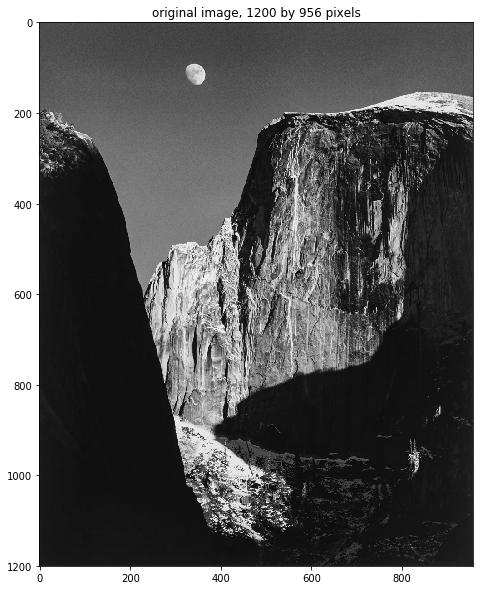

In [12]:
# Read the image from a .jpg file and get just the black intensity of each pixel
adams = plt.imread('halfdome.jpg')
M = np.float64(adams[:,:,0])
nrows, ncols = M.shape
print('size of matrix M:', M.shape)

# plot the original image (matrix)
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(M)
plt.title('original image, %d by %d pixels' % (nrows, ncols))
print()



The matrix $M$ has about a million elements, all independent of each other. Here are a few of them.

In [13]:
nrows, ncols = M.shape
print('Storage needed for all of M:', nrows*ncols)
print()
print('First 5 rows and cols of M:\n', A[:5,:5])

Storage needed for all of M: 1147200

First 5 rows and cols of M:
 [[0.1815 0.3759 0.1095 0.2781 0.7969]
 [0.3721 0.1347 0.7497 0.2156 0.3175]
 [0.2182 0.6688 0.9484 0.6584 0.5308]
 [0.7326 0.0398 0.4627 0.5352 0.258 ]
 [0.2329 0.1916 0.9313 0.4898 0.2313]]


Let's compute the SVD of $M$. We plot the singular values on a log scale.

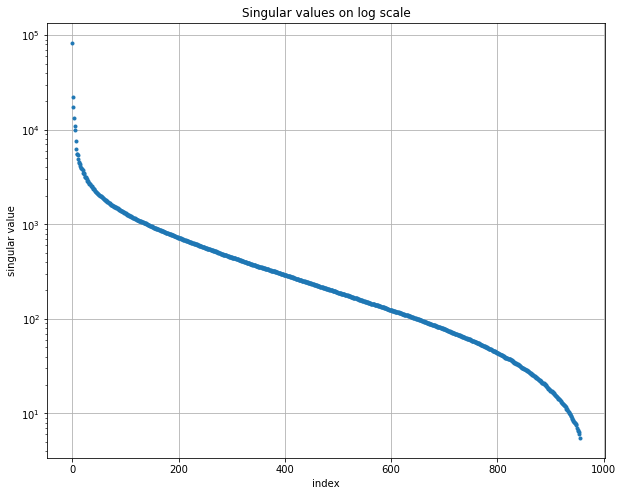

In [14]:
U, sigma, Vt = spla.svd(M)

%matplotlib inline
fig0 = plt.figure(figsize=(10,8))
plt.plot(sigma,'.')
plt.yscale('log')
plt.title('Singular values on log scale')
plt.ylabel('singular value')
plt.xlabel('index')
plt.grid()
print()

We notice that the sizes of the singular values drop by two orders of magnitude in the first 150 or so. That suggests that the rank-150 approximation to $M$ is accurate to within about $1\%$. The advantage of the approximation is that we don't need to store all of $A$; we can reconstruct the image if we just store the first 150 vectors $u_i$ and $v_i$ (we can either store the first 150 $\sigma_i$ too, or we can multiply them into the $u_i$'s or $v_i$'s).

Let's try it. We'll also verify that the 2-norms are what Theorem 7 says they should be.

In [15]:
k = 150

nrows, ncols = M.shape
Mk = np.zeros(M.shape)
for i in range(k):
    Mk += sigma[i] * np.outer(U[:,i], Vt[i,:])
    
print('2-norm(M) =', npla.norm(M,2))
print(' sigma[0] =', sigma[0])
print()
print('2-norm(M%d-M) =' % k, npla.norm(Mk-M, 2))
print('    sigma[%d] =' % k, sigma[k])
print()
print('Relative error =', sigma[k]/sigma[0])
print()

Mstorage = nrows*ncols
Mkstorage = k * (nrows+ncols)

print('Storage needed for all of M:', Mstorage)
print('Storage needed for M%d:     ' % k, Mkstorage)
print()
print('Compression factor:', Mstorage/Mkstorage)


2-norm(M) = 83403.20249998044
 sigma[0] = 83403.2024999804

2-norm(M150-M) = 943.3802639594554
    sigma[150] = 943.3802639594552

Relative error = 0.011311079619031139

Storage needed for all of M: 1147200
Storage needed for M150:      323400

Compression factor: 3.547309833024119


Finally let's look at the compressed image, which is $M_k$. You see that we do give up some image quality for the compression. 

Try changing the value of $k$ in the cell above, and running this experiment with a few different values to compare. How much can you compress without being able to see the difference between $M$ and $M_k$? At the other end, if you just take $k=1$ or $4$ or $10$ can you see any features of the original image in the compressed version?

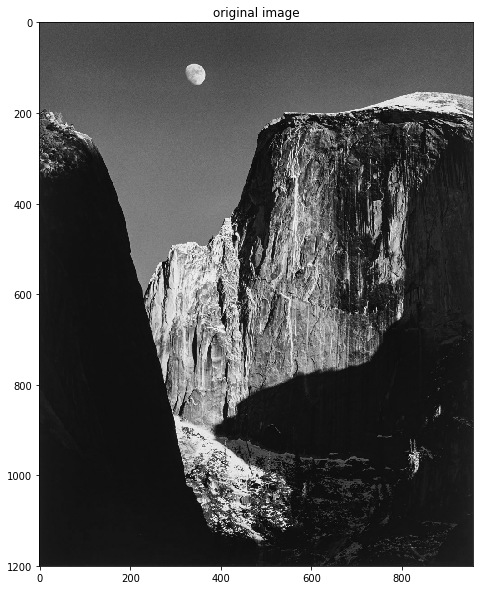

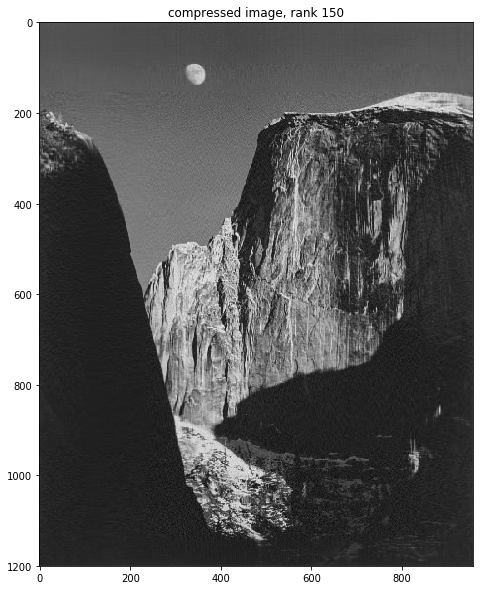

In [16]:
# plot the original image
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(M)
plt.title('original image')
print()
          
# plot the compressed image
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(Mk)
plt.title('compressed image, rank %d' % k)
print()